In [1]:
import os
import torch
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader, random_split
from torchvision import transforms

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
train_ds = MNIST('', train = True, download = True, transform = transforms.ToTensor())
test_ds = MNIST('', train = False, download = False, transform = transforms.ToTensor())

In [4]:
print(train_ds.data.shape, test_ds.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [5]:
import matplotlib.pyplot as plt 
x = train_ds.data[0]

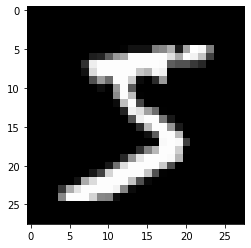

In [6]:
plt.imshow(x.reshape(28, 28), cmap = 'gray')

In [7]:
training_data = FashionMNIST('', train = True, download = True, transform = transforms.ToTensor())
test_data = FashionMNIST('', train = False, download = False, transform = transforms.ToTensor())

In [8]:
labels_map = {0: ' T-shirt',
             1: ' Trouser',
             2: 'Pullover',
             3: 'Dress',
             4: 'Coat',
             5: 'Sandal',
             6: 'Shirt',
             7: 'Sneaker',
             8: 'Bag',
             9: 'Ankle Boot'}

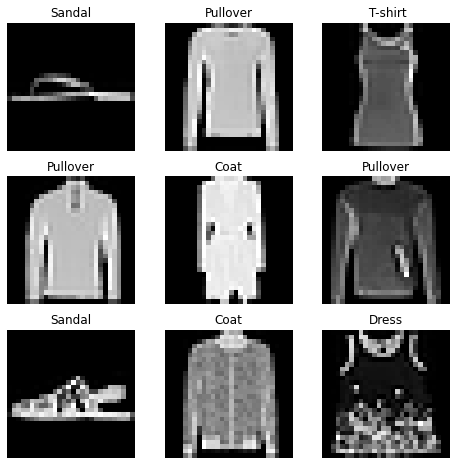

In [9]:
figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap = 'gray')
plt.show()

In [10]:
import skimage


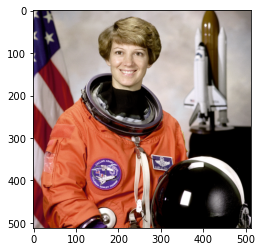

In [11]:
orig_img  = skimage.data.astronaut()
skimage.io.imsave('images_test/astronaut.jpg', orig_img)
plt.imshow(orig_img)

In [12]:
from PIL import Image
orig_img = Image.open('images_test/astronaut.jpg')

In [13]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T

In [14]:
def plot(imgs, with_orig = True, row_title = None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]
    
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fix, axs = plt.subplots(nrows = num_rows, ncols = num_cols, squeeze = False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels = [], yticklabels = [], xticks = [], yticks = [])
    if with_orig:
        axs[0, 0].set(title = 'original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel = row_title[row_idx])
    plt.tight_layout

In [15]:
resized_imgs = [T.Resize(size = size)(orig_img) for size in [30, 50, 100, orig_img.size]]

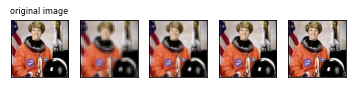

In [16]:
plot(resized_imgs)

In [22]:
import os 
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import re
import torch.nn as nn

In [18]:
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform = None, target_transform = None):
        self.img_labels = [file_name for file_name in os.listdir(img_dir)]
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels[idx])
        image = read_image(img_path)
        label = self.img_labels[idx].split('.')[0]
        label = re.sub('[0-9]', '', label)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        image = image.reshape(*image.shape[1:])
        image = 1.0 - image
        label = labels_code[label.lower()]
        return image, label

In [19]:
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.CenterCrop(28),
    # transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
])

In [20]:
test_loader = DataLoader(CustomImageDataset('./FashionMNIST', transform)
                         , shuffle=False, batch_size=10)